In [2]:
# 모듈 로드
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error


import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

from sklearn.model_selection import GridSearchCV


import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 로드
df=pd.read_csv('preprocessing_merged.csv')
df

,year,code,score,hospital_conversion,clinic_conversion,hospital_fee,clinic_fee,C0,C2,C3,...,C1_세종특별자치시,C1_경기도,C1_강원특별자치도,C1_충청북도,C1_충청남도,C1_전북특별자치도,C1_전라남도,C1_경상북도,C1_경상남도,C1_제주특별자치도
0,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,49773145,63.4,...,False,False,False,False,False,False,False,False,False,False
1,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,10208302,63.4,...,False,False,False,False,False,False,False,False,False,False
2,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,3543030,63.4,...,False,False,False,False,False,False,False,False,False,False
3,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,2489781,63.4,...,False,False,False,False,False,False,False,False,False,False
4,2009,AA154,188.11,63.4,63.4,11926.174,11926.174,2009,2710579,63.4,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137179,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,1754757,79.7,...,False,False,False,False,False,True,False,False,False,False
1137180,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,1804217,79.7,...,False,False,False,False,False,False,True,False,False,False
1137181,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,2554324,79.7,...,False,False,False,False,False,False,False,True,False,False
1137182,2023,TA006*,3496.35,79.7,92.1,278659.095,322013.835,2023,3251158,79.7,...,False,False,False,False,False,False,False,False,True,False


In [4]:
df.isna().sum()

year                     0
code                   143
score                   68
hospital_conversion      0
clinic_conversion        0
                      ... 
C1_전북특별자치도               0
C1_전라남도                  0
C1_경상북도                  0
C1_경상남도                  0
C1_제주특별자치도               0
Length: 100, dtype: int64

In [5]:
df=df.dropna(subset=['score'])
df.isna().sum()

year                     0
code                   143
score                    0
hospital_conversion      0
clinic_conversion        0
                      ... 
C1_전북특별자치도               0
C1_전라남도                  0
C1_경상북도                  0
C1_경상남도                  0
C1_제주특별자치도               0
Length: 100, dtype: int64

In [6]:
label_encoder = LabelEncoder()
df['code'] = label_encoder.fit_transform(df['code'])

df

,year,code,score,hospital_conversion,clinic_conversion,hospital_fee,clinic_fee,C0,C2,C3,...,C1_세종특별자치시,C1_경기도,C1_강원특별자치도,C1_충청북도,C1_충청남도,C1_전북특별자치도,C1_전라남도,C1_경상북도,C1_경상남도,C1_제주특별자치도
0,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,49773145,63.4,...,False,False,False,False,False,False,False,False,False,False
1,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,10208302,63.4,...,False,False,False,False,False,False,False,False,False,False
2,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,3543030,63.4,...,False,False,False,False,False,False,False,False,False,False
3,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,2489781,63.4,...,False,False,False,False,False,False,False,False,False,False
4,2009,696,188.11,63.4,63.4,11926.174,11926.174,2009,2710579,63.4,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137179,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,1754757,79.7,...,False,False,False,False,False,True,False,False,False,False
1137180,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,1804217,79.7,...,False,False,False,False,False,False,True,False,False,False
1137181,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,2554324,79.7,...,False,False,False,False,False,False,False,True,False,False
1137182,2023,9045,3496.35,79.7,92.1,278659.095,322013.835,2023,3251158,79.7,...,False,False,False,False,False,False,False,False,True,False


In [7]:
# feature와 target 분리
target=df['C63']
features = df.drop(columns=['C63'])
features.head(), target.head()

(   year  code   score  hospital_conversion  clinic_conversion  hospital_fee  \
 0  2009   696  188.11                 63.4               63.4     11926.174   
 1  2009   696  188.11                 63.4               63.4     11926.174   
 2  2009   696  188.11                 63.4               63.4     11926.174   
 3  2009   696  188.11                 63.4               63.4     11926.174   
 4  2009   696  188.11                 63.4               63.4     11926.174   
 
    clinic_fee    C0        C2    C3  ...  C1_세종특별자치시  C1_경기도  C1_강원특별자치도  \
 0   11926.174  2009  49773145  63.4  ...       False   False       False   
 1   11926.174  2009  10208302  63.4  ...       False   False       False   
 2   11926.174  2009   3543030  63.4  ...       False   False       False   
 3   11926.174  2009   2489781  63.4  ...       False   False       False   
 4   11926.174  2009   2710579  63.4  ...       False   False       False   
 
    C1_충청북도  C1_충청남도  C1_전북특별자치도  C1_전라남도  C1_경상북도  C1

>>>> 선형 회귀 모델 학습/예측/평가

In [8]:
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
    return rmse

In [9]:
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [10]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=64)

In [11]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)



LinearRegression 로그 변환된 RMSE: 2.579
Ridge 로그 변환된 RMSE: 2.646
Lasso 로그 변환된 RMSE: 88.179


[2.578903549474279, 2.645736012331089, 88.1789315303495]

In [12]:
# 회귀 계수 값의 상위10개, 하위10개 피처명과 회귀 계수 값을 반환하는 함수
def get_top_bottom_coef(model,n=10):
    #coef_ 속성을 기반으로 Series 객체를 생성, index는 칼럼명.
    coef = pd.Series(model.coef_, index=X_train.columns)

    # 상위 10개, 하위10개의 회귀 계수 반환
    coef_high=coef.sort_values(ascending=False).head(n)
    coef_low=coef.sort_values(ascending=False).tail(n)
    return coef_high,coef_low



In [13]:
# 모델 회귀 계수 시각화 함수
def visualize_coefficient(models):
    # 3개의 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig,axs=plt.subplots(figsize=(24,10), nrows=1,ncols=3)
    fig.tight_layout()

    #회귀계수시각화
    for i_num,model in enumerate(models):
        # 상위10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high,coef_low=get_top_bottom_coef(model)
        coef_concat=pd.concat([coef_high,coef_low])
        #ax subplot에 barchar로 표현, 한 화며에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents',size=25)
        axs[i_num].tick_params(axis="y",direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index,ax=axs[i_num])

In [19]:
def print_best_params(model, params):
    grid_model=GridSearchCV(model,param_grid=params,
                            scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_train,y_train)

    # RMSE 계산
    rmse = np.sqrt(-1 * grid_model.best_score_)
    # 최적의 모델을 이용하여 R2 Score 계산
    best_r2_score = grid_model.best_estimator_.score(X_train, y_train)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 R2 Score: {2}, 최적 파라미터: {3}'.format(
        model.__class__.__name__,  # 모델 클래스 이름
        np.round(rmse, 4),  # RMSE 값 반올림
        np.round(best_r2_score, 4),  # R2 Score 값 반올림
        grid_model.best_params_  # 최적 파라미터
    ))

In [15]:
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평규 RMSE 값:2.5865, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV 시 최적 평규 RMSE 값:65.2677, 최적 alpha:{'alpha': 0.03}


LinearRegression 로그 변환된 RMSE: 2.579
Ridge 로그 변환된 RMSE: 2.59
Lasso 로그 변환된 RMSE: 65.357


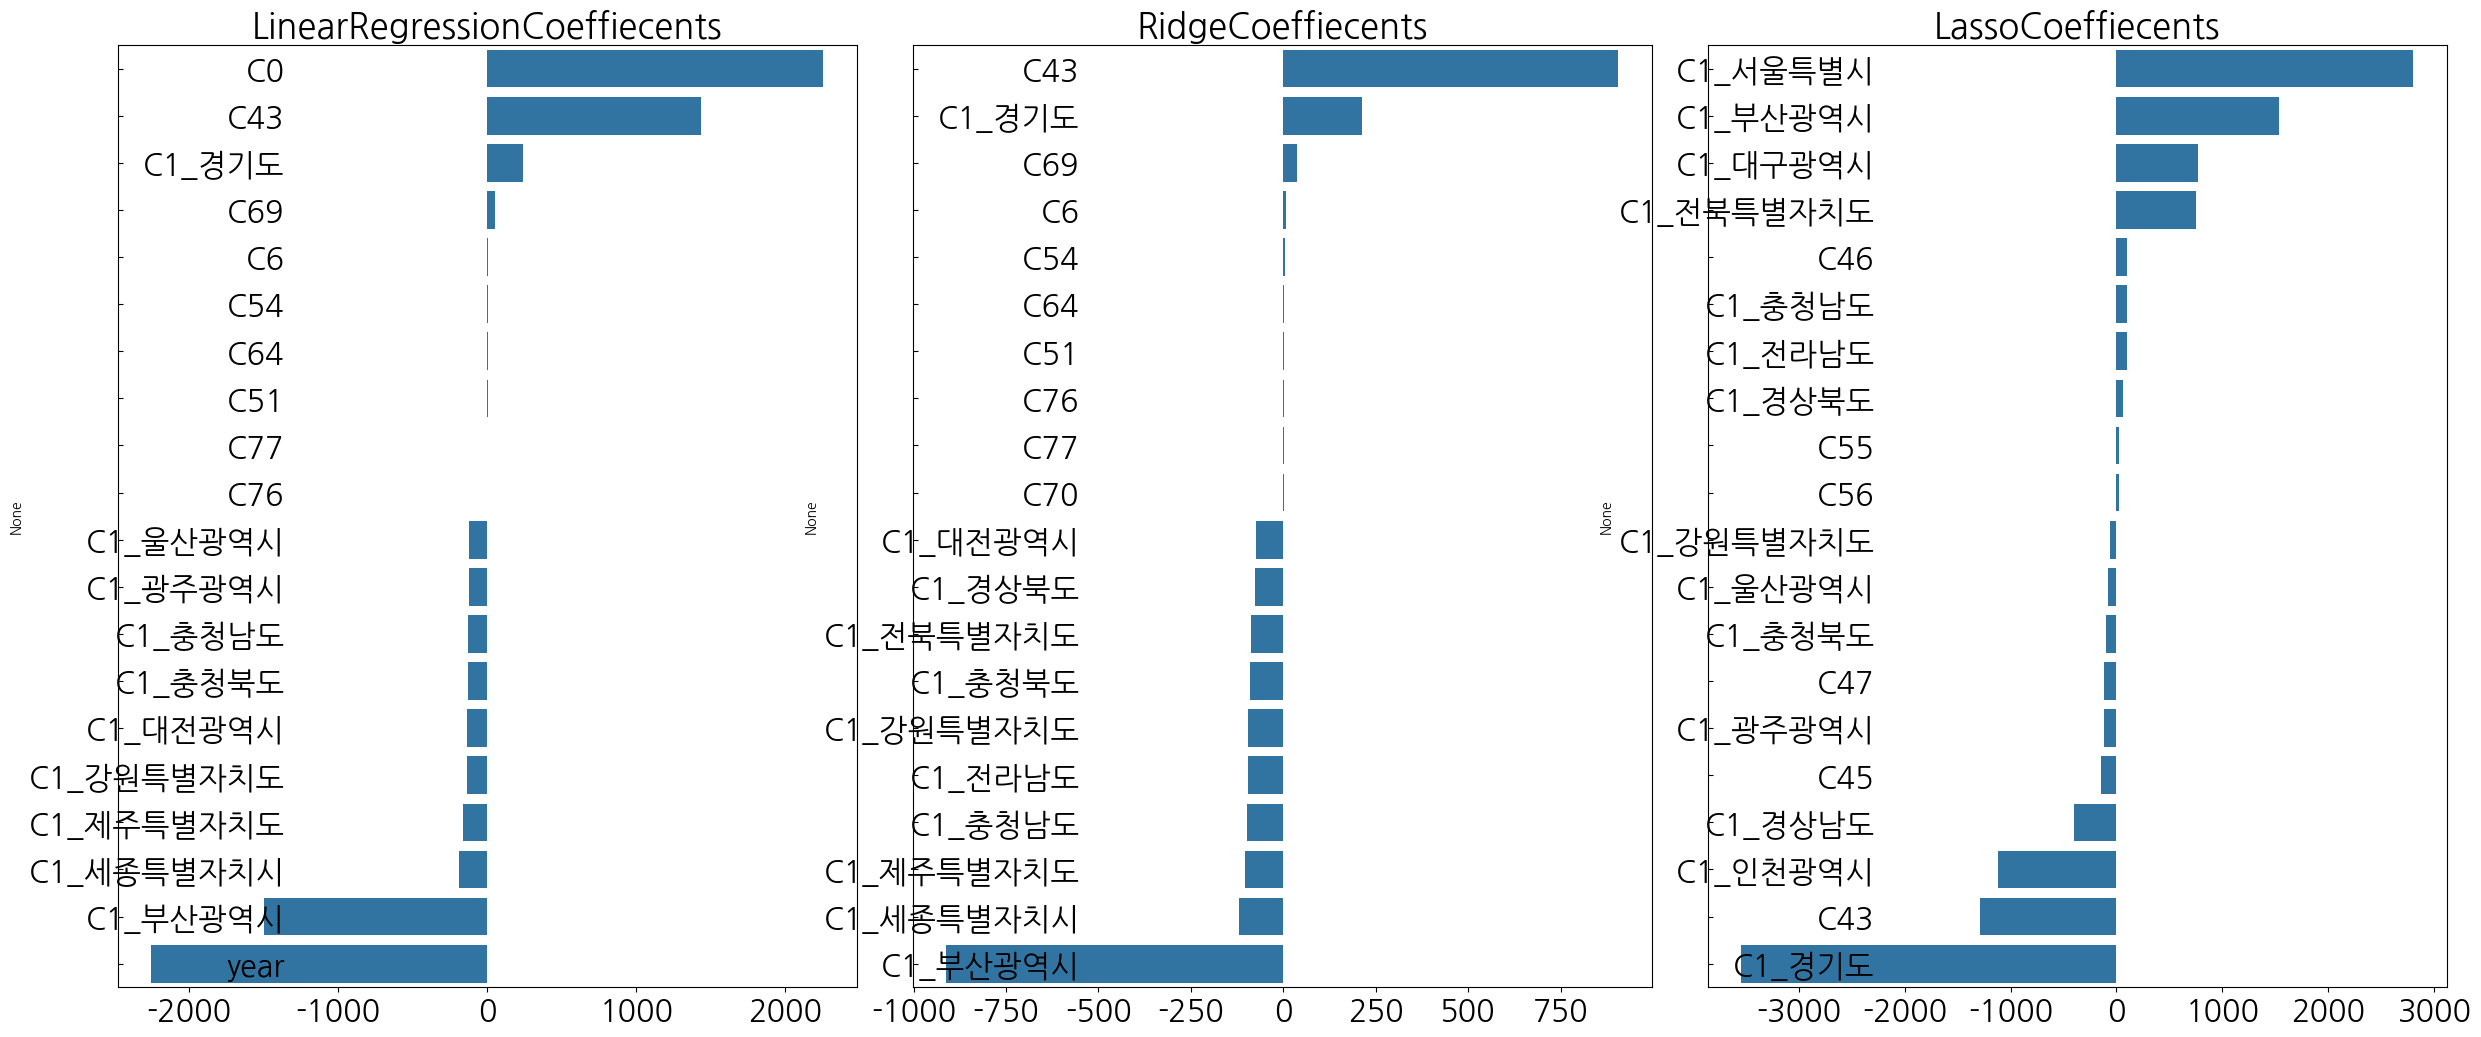

In [16]:
# 최적화 alpha 값으로 학습 데이터 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.03)
lasso_reg.fit(X_train,y_train)

# 모든 모델의 RMSE 출력
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models=[lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [20]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' :[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.0217, 최적 R2 Score: 1.0, 최적 파라미터: {'n_estimators': 1000}


In [23]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                       subsample=0.6, colsample_bytree=0.4, reg_lambda=10,n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10683
[LightGBM] [Info] Number of data points in the train set: 727753, number of used features: 98
[LightGBM] [Info] Start training from score 10304.678969
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.192061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10685
[LightGBM] [Info] Number of data points in the train set: 727753, number of used features: 98
[LightGBM] [Info] Start training from score 10291.366160
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10685
[LightGBM] [Info] Number of data points in the train set: 727754, number of used features: 98
[LightGBM] [I

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def predict_and_evaluate(model, X_train, y_train, X_test, y_test):

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 테스트 데이터 예측
    predictions = model.predict(X_test)
    
    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    # R2 Score 계산
    r2 = r2_score(y_test, predictions)
    
    # 결과 출력
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return predictions

In [25]:
predictions = predict_and_evaluate(xgb_reg, X_train, y_train, X_test, y_test)

RMSE: 0.0196
R2 Score: 1.0000


In [27]:
predictions

array([16953.02  , 21507.018 ,  4474.017 , ...,  4863.009 ,  4705.9937,
        3745.9998], dtype=float32)

In [26]:
print(predictions)

[16953.02   21507.018   4474.017  ...  4863.009   4705.9937  3745.9998]
